In [2]:
#從 sklearn裏面拿取資料：https://scikit-learn.org/stable/datasets/index.html
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
#表格內安插一行 ans 欄位, 放上iris["target"]內的資訊

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
#pandas存檔
# df.to_csv("iris.csv", encoding="utf-8", index=False)
# df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
#分群 clustering 沒有答案, 有兩種方式,
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(iris["data"])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
#labels_ 每一群資料分好之後會分到哪一群, 機械目前只分3群, 但沒有答案, 所以不對照答案
#演算法做出來的分群, 把這個當作答案, 當做後續的使用, 運用每一筆資料的相似度來標注答案
df["labels"] = cluster.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
# cluster_cneters 是做一個虛擬的圓心, 分完了三個群, petal lenth 分一群到目前分出來圓心的平均距離 5.9016, 每一個 petal width 到目前圓心的平均距離
# 0 這一群的圓心 [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],   
# 1 這一群的圓心 [5.006     , 3.428     , 1.462     , 0.246     ]
cluster.cluster_centers_    

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [9]:
#算親疏程度 silhouette_score
from sklearn.metrics import silhouette_score
ks, scores = [], []
for k in range(2, 6):
    cluster_test = KMeans(n_clusters=k)
    cluster_test.fit(iris["data"])
    s = silhouette_score(iris["data"], cluster_test.labels_)
    ks.append(k)
    scores.append(round(s, 3))
print(ks)
print(scores)

[2, 3, 4, 5]
[0.681, 0.553, 0.497, 0.489]


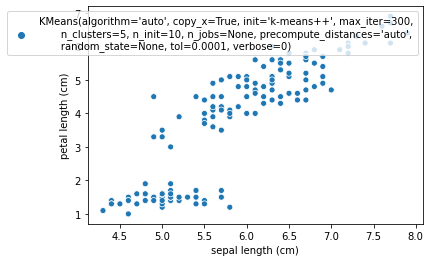

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
#這個cell裏面有多少圖就直接打印出來
%matplotlib inline
xs, ys = df["sepal length (cm)"], df["petal length (cm)"]
#sns.scatterplot(xs, ys, iris["target"])
sns.scatterplot(xs, ys, cluster_test)
#統計沒有正確答案, 只要知道在做甚麼事情, 合情合理就可以
#目前做出來分成2群, 但實際上常識來說可能會退而求其次選擇3群, 憑著經驗和常識處理

# summary
+ 由上面結果得知, 分成2群的機會是 0.681%, 分成3群的機會是0.553, 由 scatterplot畫出來的圖得知setosa各自分為一群, 其他兩個較為不好分群, 
+ 因此可以分成2群或是3群試試看哪一種解說可以說得過去